In [2]:
import sys 
import os 
import numpy as np 
from glob import glob 
import seaborn as sns 

import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers, losses 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
current_dir=os.getcwd()
print(current_dir)

C:\Users\HP\PycharmProjects\pythonProject7


In [4]:
paths = {
    'project': current_dir,
    'data': os.path.join(current_dir, 'skin_cancer_dataset', 'data'),
    'train': 'train',
    'test': 'test'
}

train_dir = os.path.join(paths['data'], paths['train'])
test_dir=os.path.join(paths['data'], paths['test'])

train_benign_dir = os.path.join(paths['data'], paths['train'], 'benign')
train_malignant_dir = os.path.join(paths['data'], paths['train'], 'malignant')
test_benign_dir = os.path.join(paths['data'], paths['test'], 'benign')
test_malignant_dir = os.path.join(paths['data'], paths['test'], 'malignant')


print(train_benign_dir)
print(test_malignant_dir)

C:\Users\HP\PycharmProjects\pythonProject7\skin_cancer_dataset\data\train\benign
C:\Users\HP\PycharmProjects\pythonProject7\skin_cancer_dataset\data\test\malignant


In [5]:
common_datagen_params = {
    'rescale': 1./255
}

train_img_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    **common_datagen_params
)


train_data = train_img_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    batch_size=128,
    class_mode='binary',  
    shuffle=True
)


Found 2637 images belonging to 2 classes.


In [6]:
test_img_gen = ImageDataGenerator(**common_datagen_params) 


test_data=test_img_gen.flow_from_directory(
    directory=test_dir, 
    target_size=(224,224),
    batch_size=128, 
    class_mode='binary'
)

Found 660 images belonging to 2 classes.


In [7]:
train_data.image_shape

(224, 224, 3)

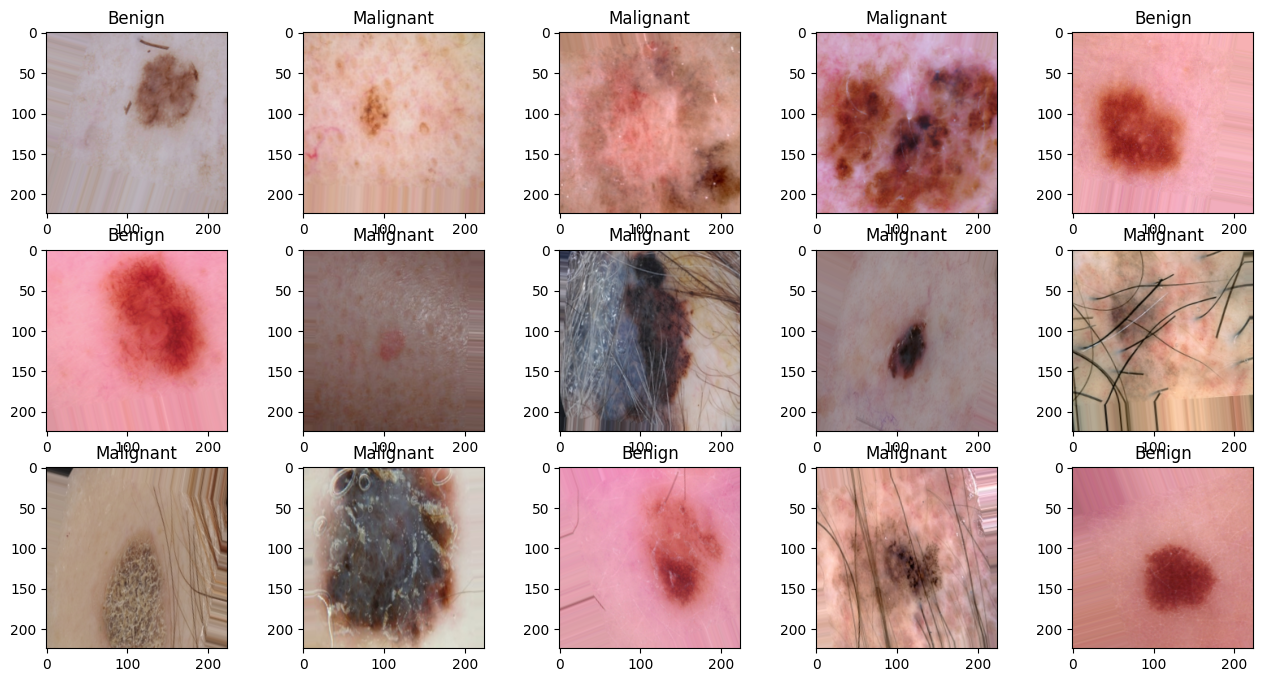

In [8]:
images, labels=train_data.next() 

fig=plt.figure(figsize=(16,8))
columns=5 
rows=3

for i in range(1, columns*rows + 1):
    ax=fig.add_subplot(rows, columns, i)

    img=images[i - 1]
    label=int(labels[i-1])

    if label==0: 
        ax.title.set_text('Benign')
    else: 
        ax.title.set_text('Malignant')


    plt.imshow(img)
 

plt.show()
    

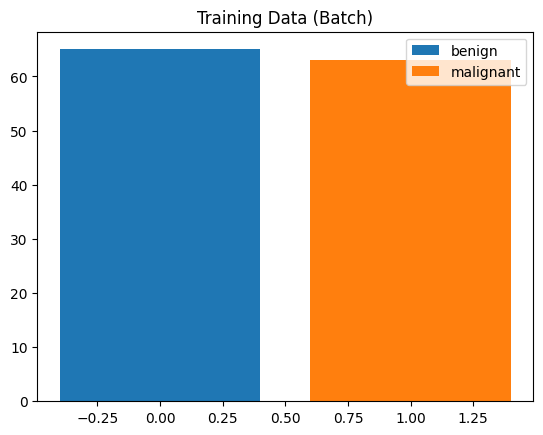

In [9]:
batch_images, batch_labels=train_data.next() 

if len(batch_labels.shape) == 1:
    class_indices=batch_labels
else: 
    class_indices=np.argmax(batch_labels, axis=1)

plt.bar(0, np.sum(class_indices == 0), label = 'benign')
plt.bar(1, np.sum(class_indices == 1), label = 'malignant')
plt.legend()
plt.title("Training Data (Batch)")
plt.show()

In [10]:
CNNmodel=Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)), 
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, (3,3), activation='relu'), 
    layers.MaxPooling2D(pool_size=(2,2)), 
    layers.Conv2D(128, (3,3), activation='relu'), 
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(), 
    layers.Dense(256, activation='relu'), 
    layers.Dropout(0.5), 
    layers.Dense(128, activation='relu'), 
    layers.Dropout(0.5),  
    layers.Dense(1,activation='sigmoid')
])

In [11]:
CNNmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
CNNmodel.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       

In [12]:
tot_trainsz = len(os.listdir(train_benign_dir)) + len(os.listdir(train_malignant_dir))
tot_testsz = len(os.listdir(test_benign_dir)) + len(os.listdir(test_malignant_dir))

In [13]:
history = CNNmodel.fit(train_data,
         batch_size=128,
         epochs=5,
         steps_per_epoch=tot_trainsz // 128,
         validation_data=test_data,
         validation_steps=tot_testsz // 128)

Epoch 1/5


20/20 [==============================] - 175s 8s/step - loss: 0.7449 - accuracy: 0.6002 - val_loss: 0.5447 - val_accuracy: 0.7578
Epoch 2/5
20/20 [==============================] - 172s 8s/step - loss: 0.5378 - accuracy: 0.7377 - val_loss: 0.4746 - val_accuracy: 0.7719
Epoch 3/5
20/20 [==============================] - 241s 12s/step - loss: 0.4716 - accuracy: 0.7688 - val_loss: 0.4266 - val_accuracy: 0.7734
Epoch 4/5
20/20 [==============================] - 175s 8s/step - loss: 0.4438 - accuracy: 0.7892 - val_loss: 0.4096 - val_accuracy: 0.7844
Epoch 5/5
20/20 [==============================] - 195s 9s/step - loss: 0.4410 - accuracy: 0.7912 - val_loss: 0.4226 - val_accuracy: 0.7844


In [14]:
history.history                                                                                  

{'loss': [0.7449478507041931,
  0.5377539396286011,
  0.4715699255466461,
  0.44381681084632874,
  0.44103243947029114],
 'accuracy': [0.6002391576766968,
  0.7377440929412842,
  0.7688322067260742,
  0.7891589999198914,
  0.7911518812179565],
 'val_loss': [0.5447067618370056,
  0.4745921194553375,
  0.4265664517879486,
  0.40964728593826294,
  0.42263540625572205],
 'val_accuracy': [0.7578125,
  0.7718750238418579,
  0.7734375,
  0.784375011920929,
  0.784375011920929]}

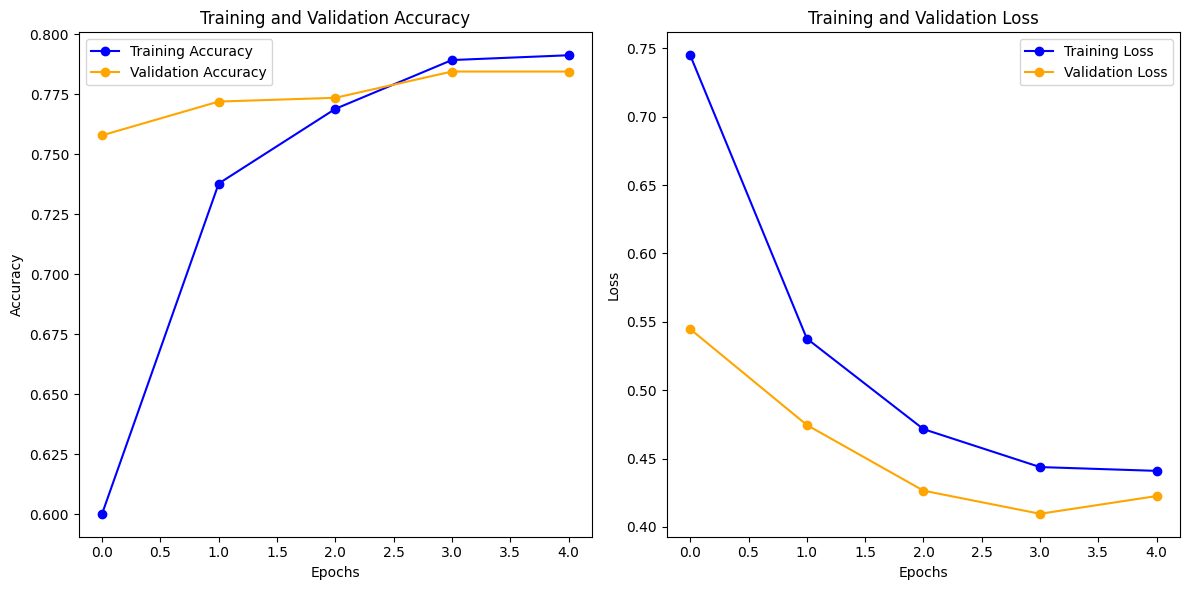

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']



plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy', color='blue', marker='o')
plt.plot(val_acc, label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss', color='blue', marker='o')
plt.plot(val_loss, label='Validation Loss', color='orange', marker='o')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


In [16]:
prediction=CNNmodel.predict(train_data)

21/21 [==============================] - 103s 5s/step


In [17]:
predicted_labels = (prediction > 0.5).astype(int).flatten()
true_labels = train_data  # Replace with your actual validation labels

In [18]:
CNNmodel.save('skin_cancer_model_with_history4.keras')

In [19]:
import json

In [20]:
history_filename = 'training_history1.json'
with open(history_filename, 'w') as json_file:
    json.dump(history.history, json_file)